# Proyek Analisis Data: Indek Air Quality
- Nama: Teduh Afriyoko
- Email: teduhafr@gmail.com
- Id Dicoding:teduhafr

## Menentukan Pertanyaan Bisnis
- Bagaimana kualitas udara PM2.5 dan PM10 di kota-kota selama tahun 2013 - 2017? 
- Kapankah kualitas udara (PM2.5 dan PM10) terbersih dan terkotor selama tahun 2013 - 2017?
- Kota mana yang mendapat kualitas udara terbersih selama tahun 2013 - 2017?
Keterangan: untuk mempermudah data hanya akan dipakai 5 kota

jalankan ini di terminal
jupyter nbextension enable --py widgetsnbextension

### Data Wragling
#### Gathering Data

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

from ipywidgets import widgets, interact

In [2]:
#karena datanya terpisah-pisah, sebelum diolah baiknya kita gabung dulu
data_df= pd.concat(map(pd.read_csv, glob.glob(os.path.join('./air_quality/', "*.csv"))))

In [3]:
data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


pertanyaan. 
bagaimana kualitas udara PM2.5 dan PM10 di kota-kota cina selama tahun 2013 - 2017
Kapankah kualitas udara (PM2.5 dan PM10) terbersih dan terkotor?
kaitkan dengan data di https://www.bmkg.go.id/kualitas-udara/informasi-partikulat-pm25.bmkg
https://www.bmkg.go.id/kualitas-udara/informasi-partikulat-pm10.bmkg

In [4]:
#### Assessing Data

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [6]:
#terdapat beberapa data yang tidak sama, karena jumlahnya besar akan dihapus data-data yang kosong.

In [7]:
#mencari data yang duplikat
print("Jumlah duplikasi: ", data_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
#lihat data statistiknya
data_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data


In [9]:
#menghapus data yang kosong
data_df = data_df.dropna(how='any')
data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 382168 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       382168 non-null  int64  
 1   year     382168 non-null  int64  
 2   month    382168 non-null  int64  
 3   day      382168 non-null  int64  
 4   hour     382168 non-null  int64  
 5   PM2.5    382168 non-null  float64
 6   PM10     382168 non-null  float64
 7   SO2      382168 non-null  float64
 8   NO2      382168 non-null  float64
 9   CO       382168 non-null  float64
 10  O3       382168 non-null  float64
 11  TEMP     382168 non-null  float64
 12  PRES     382168 non-null  float64
 13  DEWP     382168 non-null  float64
 14  RAIN     382168 non-null  float64
 15  wd       382168 non-null  object 
 16  WSPM     382168 non-null  float64
 17  station  382168 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.4+ MB


### Exploratory Data Analysis (EDA)
#### Explore

In [10]:
data_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,17955.931070,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031
std,10001.787087,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,9610.000000,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,18103.000000,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,26515.000000,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [11]:
#mencari corelation di seluruh field
data_df.corr(numeric_only=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.968620,0.056211,0.016624,-0.003728,-0.026866,-0.049872,-0.227301,-0.042262,0.025281,-0.048242,-0.133544,0.193543,-0.110269,0.005496,0.056503
year,0.968620,1.000000,-0.192834,-0.008714,-0.003916,-0.029904,-0.044236,-0.168161,-0.052299,0.012698,-0.022092,-0.167188,0.194616,-0.178617,0.001162,0.091041
month,0.056211,-0.192834,1.000000,0.017476,-0.001570,0.013363,-0.021498,-0.223866,0.041530,0.049558,-0.101052,0.146401,-0.022140,0.283626,0.017509,-0.142276
day,0.016624,-0.008714,0.017476,1.000000,-0.002153,0.003457,0.024428,-0.006733,0.013503,-0.017784,-0.001101,0.012243,0.022391,0.024001,-0.002783,-0.013504
hour,-0.003728,-0.003916,-0.001570,-0.002153,1.000000,0.013275,0.051421,0.032342,-0.002536,-0.030150,0.281204,0.139155,-0.038386,-0.012506,0.012610,0.137995
PM2.5,-0.026866,-0.029904,0.013363,0.003457,0.013275,1.000000,0.884324,0.482209,0.670753,0.792041,-0.151149,-0.128907,0.013717,0.118009,-0.015268,-0.275686
PM10,-0.049872,-0.044236,-0.021498,0.024428,0.051421,0.884324,1.000000,0.466561,0.653577,0.703535,-0.114345,-0.094793,-0.021942,0.072706,-0.026885,-0.185789
SO2,-0.227301,-0.168161,-0.223866,-0.006733,0.032342,0.482209,0.466561,1.000000,0.501317,0.535289,-0.167093,-0.320991,0.218994,-0.266446,-0.040618,-0.109259
NO2,-0.042262,-0.052299,0.041530,0.013503,-0.002536,0.670753,0.653577,0.501317,1.000000,0.705651,-0.476812,-0.276387,0.172287,-0.028276,-0.043946,-0.402566
CO,0.025281,0.012698,0.049558,-0.017784,-0.030150,0.792041,0.703535,0.535289,0.705651,1.000000,-0.315060,-0.323402,0.183800,-0.054173,-0.013302,-0.297760


- karena pembahsan saya berfokus pada PM2.5 dan PM10, saya akan membahas terkait 2 ini saja
-  Jonathan Sarwono hubungan korelasi adalah sebagai berikut :
- 0 : Tidak ada korelasi
- 0.00 - 0.25 : korelasi sangat lemah
- 0.25 - 0.50 : korelasi cukup
- 0.50 - 0.75 : korleasi kuat
- 0.75 - 0.99 : korelasi sangat kuat
- 1 : korelasi sempurna

##### PM2.5
- bisa kita lihat PM2.5 dan PM10 berkorelasi 0.88, jadi ini sangat kuat
- PM2.5 juga memiliki korelasi  untuk NO2 (kuat) dan CO (sangat kuat), 

##### PM10
- memiliki korelasi yagn sangat kuat dengan PM2.5
- memiliki korelasi kuat untuk NO2 dan CO


### Visualization & Ecplanatory Analysis
#### Bagaimana kualitas udara PM2.5 dan PM10 di kota-kota selama tahun 2013 - 2017

In [12]:
#melihat data keseluruhan dulu secara umum per tahun secara rata - rata
# gabung dulu tahun dan bulan 
data_df['bantuan'] = '-'
data_df['yearmonth'] = data_df['year'].astype(str) + data_df['bantuan'] + data_df['month'].astype(str)
data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,bantuan,yearmonth
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,-,2013-3
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,-,2013-3
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,-,2013-3
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,-,2013-3
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,-,2013-3


In [13]:
#hapus kolom bantuan
data_df.drop('bantuan', axis=1, inplace=True)
data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,yearmonth
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-3
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-3
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-3
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-3
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-3


In [14]:
data_pertahun_perbulan = data_df.groupby(['station', 'yearmonth']).agg({'PM2.5': 'mean', 'PM10': 'mean'})
print(data_pertahun_perbulan)

                              PM2.5        PM10
station       yearmonth                        
Aotizhongxin  2013-10     95.896755  119.719764
              2013-11     50.157303   77.231461
              2013-12     87.172764  121.686992
              2013-3     114.719755  148.294028
              2013-4      58.616099  104.509288
...                             ...         ...
Wanshouxigong 2016-7      74.146575   82.195890
              2016-8      50.559275   64.637378
              2016-9      56.176923   68.695385
              2017-1     129.580793  145.310976
              2017-2      78.979463   92.429700

[574 rows x 2 columns]


### Data PM2.5

<function matplotlib.pyplot.show(close=None, block=None)>

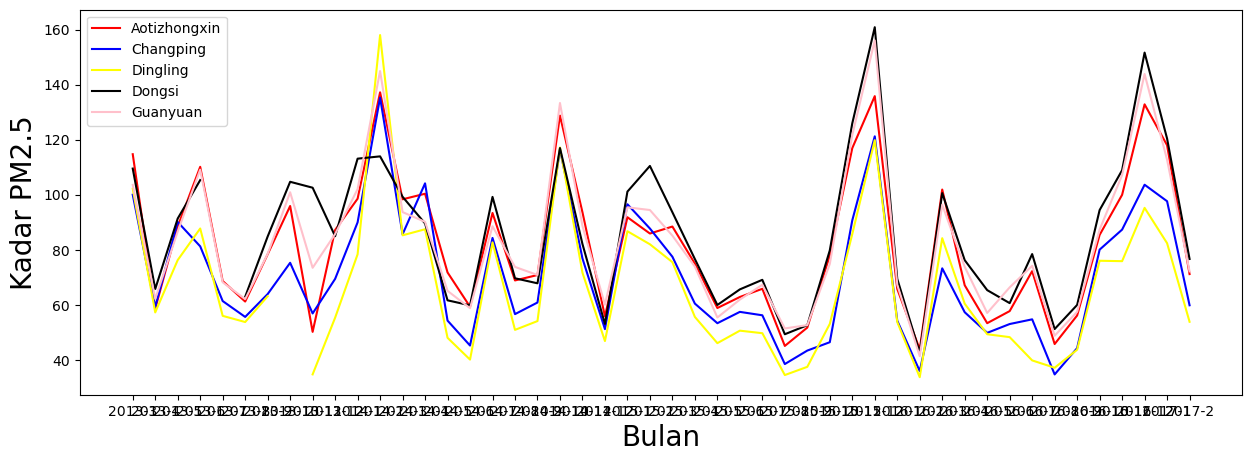

In [15]:
#buat visualisasinya untuk PM2.5
data_pivot_pm25 = data_df.pivot_table('PM2.5', ['year', 'month', 'yearmonth'], 'station', aggfunc='mean').reset_index()
plt.figure(figsize=(15, 5))
plt.plot(data_pivot_pm25['yearmonth'], data_pivot_pm25['Aotizhongxin'], label = 'Aotizhongxin', color='red')
plt.plot(data_pivot_pm25['yearmonth'], data_pivot_pm25['Changping'], label = 'Changping', color='blue')
plt.plot(data_pivot_pm25['yearmonth'], data_pivot_pm25['Dingling'], label = 'Dingling', color='yellow')
plt.plot(data_pivot_pm25['yearmonth'], data_pivot_pm25['Dongsi'], label = 'Dongsi', color='black')
plt.plot(data_pivot_pm25['yearmonth'], data_pivot_pm25['Guanyuan'], label = 'Guanyuan', color='pink')
plt.xlabel('Bulan',size= 20)
plt.ylabel('Kadar PM2.5', size = 20)
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

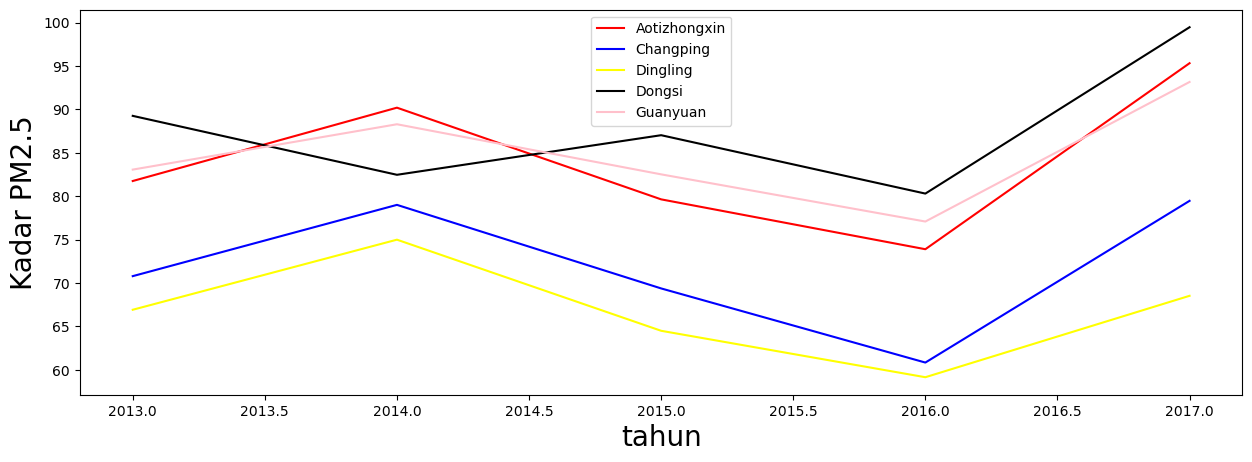

In [16]:
#untuk mempermudah perbandingan akan kita buat data pertahun untuk bisa melihatnya dengan mudah
data_pivot_pm25_tahun = data_df.pivot_table('PM2.5', 'year', 'station', aggfunc='mean').reset_index()

plt.figure(figsize=(15, 5))
plt.plot(data_pivot_pm25_tahun_filter['year'], data_pivot_pm25_tahun_filter['Aotizhongxin'], label = 'Aotizhongxin', color='red')
plt.plot(data_pivot_pm25_tahun_filter['year'], data_pivot_pm25_tahun_filter['Changping'], label = 'Changping', color='blue')
plt.plot(data_pivot_pm25_tahun_filter['year'], data_pivot_pm25_tahun_filter['Dingling'], label = 'Dingling', color='yellow')
plt.plot(data_pivot_pm25_tahun_filter['year'], data_pivot_pm25_tahun_filter['Dongsi'], label = 'Dongsi', color='black')
plt.plot(data_pivot_pm25_tahun_filter['year'], data_pivot_pm25_tahun_filter['Guanyuan'], label = 'Guanyuan', color='pink')
plt.xlabel('tahun',size= 20)

plt.ylabel('Kadar PM2.5', size = 20)
plt.legend()
plt.show

In [17]:
#dari tabel di atas bisa kita lihat kualitas udara (PM2.5) sepanajng tahun 2013 - 2017 di 5 kota.

In [115]:
## untuk lebih detail dan menarik kita bisa membuat dat per tahun dengan filter. 

interact(pilihTahun, tahun=list(data_pivot_pm25['year'].unique()))

def pilihTahun(tahun):
    data_pivot_pm25_filter = data_pivot_pm25[(data_pivot_pm25.year == tahun)]
    plt.figure(figsize=(12, 5))
    plt.plot(data_pivot_pm25_filter['month'], data_pivot_pm25_filter['Aotizhongxin'], label = 'Aotizhongxin', color='red')
    plt.plot(data_pivot_pm25_filter['month'], data_pivot_pm25_filter['Changping'], label = 'Changping', color='blue')
    plt.plot(data_pivot_pm25_filter['month'], data_pivot_pm25_filter['Dingling'], label = 'Dingling', color='yellow')
    plt.plot(data_pivot_pm25_filter['month'], data_pivot_pm25_filter['Dongsi'], label = 'Dongsi', color='black')
    plt.plot(data_pivot_pm25_filter['month'], data_pivot_pm25_filter['Guanyuan'], label = 'Guanyuan', color='pink')
    plt.xlabel('Bulan',size= 20)
    plt.ylabel('Kadar PM2.5', size = 20)
    judul  = 'Data Kulatias PM 2.5 Kota Tahun ' + str(tahun) +  '\n makin kecil makin bagus'
    plt.title(judul , fontsize=15)
    plt.legend()
    plt.show


    




interactive(children=(Dropdown(description='tahun', options=(2013, 2014, 2015, 2016, 2017), value=2013), Outpu…

In [114]:
# untuk PM 2.5 kita sudah bisa melihat data tiap kota sampai per tahun, berikutnya akan kita akan olah di PM 10